In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

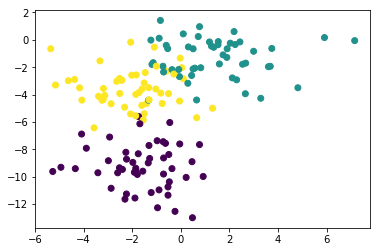

In [9]:
# cluster_std 样本点与点之间的距离的方差，默认值是1
train,target = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=1.5,random_state=2)
plt.scatter(train[:,0],train[:,1],c=target)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
xmin,xmax = train[:,0].min(),train[:,0].max()
ymin,ymax = train[:,1].min(),train[:,1].max()

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)

X_test = np.c_[xx.ravel(),yy.ravel()]

In [15]:
y1_ = KNeighborsClassifier().fit(train,target).predict(X_test)

In [16]:
y2_ = LogisticRegression().fit(train,target).predict(X_test)

In [23]:
y3_ = DecisionTreeClassifier(max_depth=2).fit(train,target).predict(X_test)

In [18]:
y4_ = GaussianNB().fit(train,target).predict(X_test)

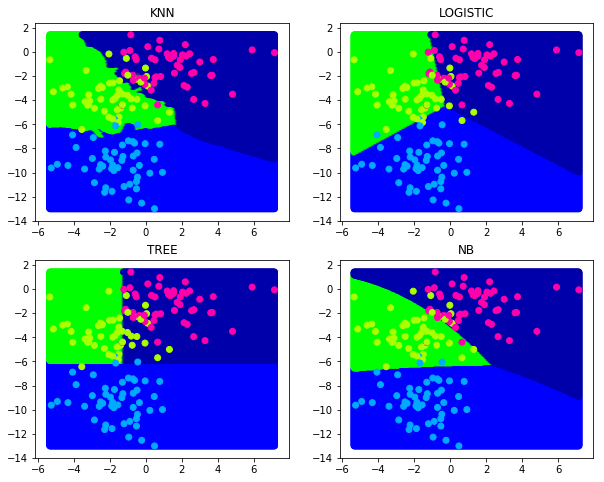

In [25]:
# 绘图展示4个分类结果
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['#00aaff','#ff00aa','#aaff00'])
cmap2 = ListedColormap(['#0000ff','#0000aa','#00ff00'])

plt.figure(figsize=(10,8))
results = [y1_,y2_,y3_,y4_]
titles = ['KNN','LOGISTIC','TREE','NB']
for i in range(4):
    location = i + 1
    axes = plt.subplot(2,2,location)
    y_ = results[i]
    title = titles[i]
    axes.scatter(X_test[:,0],X_test[:,1],c=y_,cmap=cmap2)
    axes.scatter(train[:,0],train[:,1],c=target,cmap=cmap1)
    axes.set_title(title)